# Licitações realizadas pela Universidade Federal do Paraná (2014~2020)
# Relatório de Análise de Dados I

## Importando Dados

In [307]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [308]:
dados = pd.read_csv('dadosTratados.csv', sep = ';')

In [309]:
homologados = dados.query("situacao == 'Homologado'")
homologados.head()

,ano,modalidade,numero_ano,processo,situacao,objeto,natureza,demandante,modalidade_compra,homologacao_mes,valor_estimado_ufpr,valor_estimado_outros,valor_contratado_ufpr,valor_contratado_outros,homologacao_mes_ano
5,2014,Concorrência Pública,005/2014,001426/2014-16,Homologado,Concessão de uso de espaço físico para explora...,Sem Informação,PCU,Contrato,NaN,0.00,0.0,0.00,0.0,NaN
7,2014,Concorrência Pública,007/2014,047629/2013-78,Homologado,"Concessão de uso de espaço físico, cantina do ...",Sem Informação,SEPT,Sem Informação,NaN,1750.00,0.0,2603.25,0.0,NaN
8,2014,Concorrência Pública,008/2014,013682/2014-56,Homologado,Permissão de uso reprografia jurídicas,Sem Informação,DSG,Sem Informação,NaN,1290.68,0.0,1511.91,0.0,NaN
9,2014,Concorrência Pública,009/2014,007760/2014-83,Homologado,Concessão de uso de espaço físico para funcion...,Sem Informação,Politécnico,Sem Informação,NaN,1569.14,0.0,7700.00,0.0,NaN
12,2014,Pregão Eletrônico,018/2014,01.392/2014-60,Homologado,Aquisição de materiais hidráulicos para manute...,Materiais,PCU,Sem Informação,NaN,286235.50,0.0,280600.20,0.0,NaN


In [310]:
hom_ano = homologados.ano.value_counts()
max_ano = homologados.groupby('ano').valor_contratado_ufpr.max()

hom_max_ano = {
    'Ano' : hom_ano.index,
    'Homologações': hom_ano.values,
    'Valor Máximo Contratado': max_ano.values
}
pd.DataFrame(hom_max_ano)

,Ano,Homologações,Valor Máximo Contratado
0,2018,185,9094856.61
1,2014,169,5308509.00
2,2016,167,11878847.43
3,2019,151,15599891.88
4,2015,131,22547908.87
5,2017,124,7719679.00
6,2020,112,31694389.38


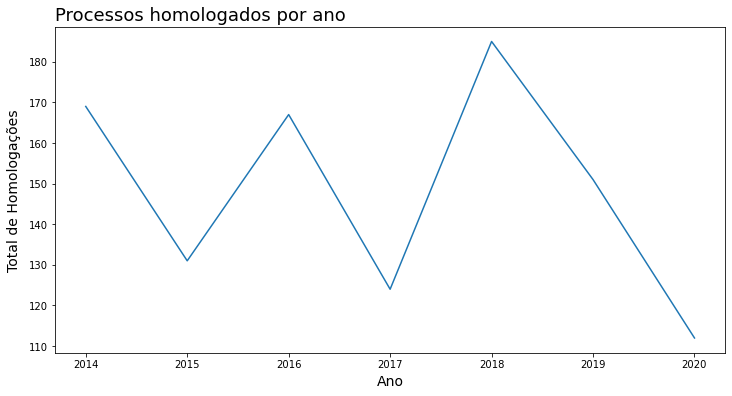

In [311]:
ax = sns.lineplot(x='Ano', y='Homologações', data=hom_max_ano)
ax.figure.set_size_inches(12, 6)
ax.set_title('Processos homologados por ano', loc='left', fontsize=18)
ax.set_xlabel('Ano', fontsize=14, labelpad=5)
ax.set_ylabel('Total de Homologações', fontsize=14, labelpad=8)
ax = ax

In [312]:
outras_modalidades = homologados.query('modalidade != "Pregão Eletrônico"')
pregão = homologados.query('modalidade == "Pregão Eletrônico"')

In [313]:
modalidades = {
    'Modalidade': ['Pregão Eletrônico', 'Outras'],
    'Total': [pregão.shape[0], outras_modalidades.shape[0]]
}

modalidades = pd.DataFrame(modalidades)

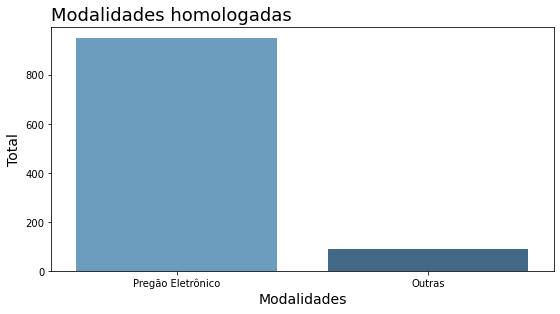

In [314]:
# Modalidades de Licitação
ax = sns.barplot(x='Modalidade', y='Total', data=modalidades,
                palette="Blues_d")
ax.figure.set_size_inches(9, 4.5)
ax.set_title('Modalidades homologadas', loc='left', fontsize=18)
ax.set_xlabel('Modalidades', fontsize=14)
ax.set_ylabel('Total', fontsize=14)
ax=ax

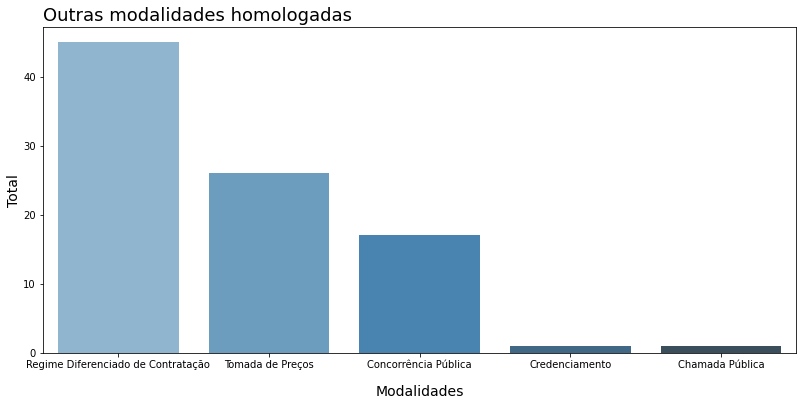

In [315]:
# Outras Modalidades de Licitação
ax = sns.barplot(x=outras_modalidades.modalidade.value_counts().index,
                 y=outras_modalidades.modalidade.value_counts().values,
                 data=outras_modalidades, 
                 palette="Blues_d")
ax.figure.set_size_inches(13.5, 6)
ax.set_title('Outras modalidades homologadas', loc='left', fontsize=18)
ax.set_xlabel('Modalidades', fontsize=14, labelpad=15)
ax.set_ylabel('Total', fontsize=14, labelpad=2)
ax=ax

In [316]:
homologados.natureza.value_counts()

Materiais                 509
Sem Informação            353
Serviço                   168
Materiais e Serviço         6
Equipamento                 2
Material e Mão de Obra      1
Name: natureza, dtype: int64

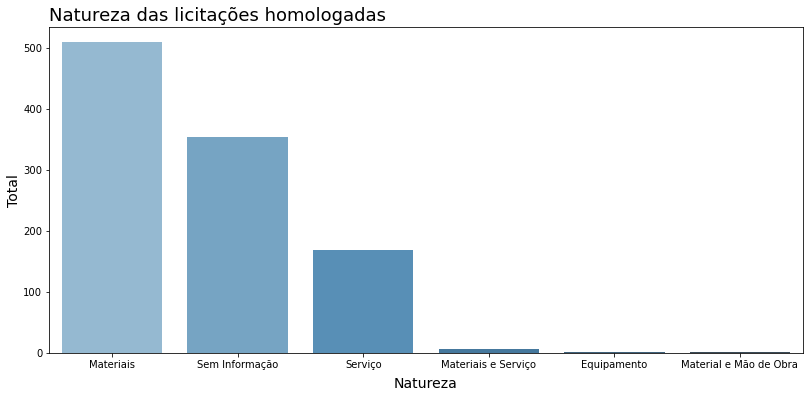

In [317]:
ax = sns.barplot(x=homologados.natureza.value_counts().index,
                 y=homologados.natureza.value_counts().values,
                 data=homologados, 
                 palette="Blues_d")
ax.figure.set_size_inches(13.5, 6)
ax.set_title('Natureza das licitações homologadas', loc='left', fontsize=18)
ax.set_xlabel('Natureza', fontsize=14, labelpad=7)
ax.set_ylabel('Total', fontsize=14, labelpad=2)
ax=ax

In [342]:
hom_por_mes = homologados.groupby('homologacao_mes_ano').ano.count().to_frame().reset_index()
hom_por_mes.columns = ['Mês de homologação', 'Total']
hom_por_mes['Mês de homologação'] = pd.to_datetime(hom_por_mes['Mês de homologação'])
hom_por_mes

,Mês de homologação,Total
0,2015-01-01,3
1,2015-02-01,8
2,2015-03-01,9
3,2015-04-01,7
4,2015-05-01,3
...,...,...
67,2020-08-01,8
68,2020-09-01,6
69,2020-10-01,10
70,2020-11-01,5


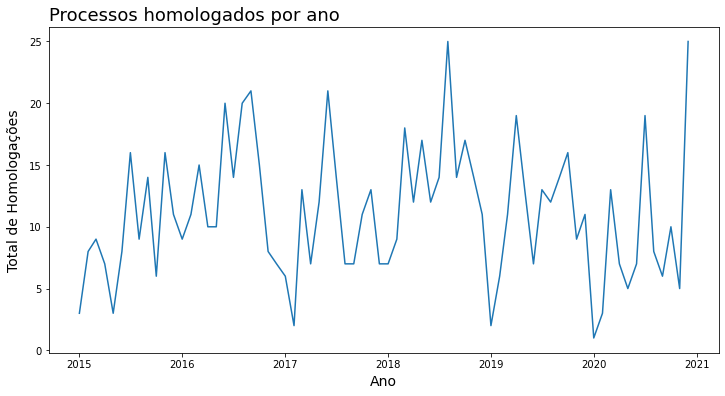

In [343]:
ax = sns.lineplot(x='Mês de homologação', y='Total', data=hom_por_mes)
ax.figure.set_size_inches(12, 6)
ax.set_title('Processos homologados por ano', loc='left', fontsize=18)
ax.set_xlabel('Ano', fontsize=14, labelpad=5)
ax.set_ylabel('Total de Homologações', fontsize=14, labelpad=8)
ax = ax